#Python Set-4 ( Optional)
1. Determine if the following sets of vectors are linearly independent or not in $\mathbb{R}^6$.
$$
S=     \left\{    \quad
 \left(\begin{array}{r}1 \\1 \\-1\\ 1 \\2 \\1\end{array}\right) , \quad
\left(\begin{array}{r}2 \\1 \\ 1\\4\\ 5\\ 6\end{array}\right), \quad
\left(\begin{array}{r}3 \\1 \\-1\\ 1\\5\\2 \end{array}\right), \quad
\left(\begin{array}{r}4  \\2\\1\\ 1\\3\\2 \end{array}\right),  \quad
\left(\begin{array}{r}5  \\2\\0\\ 3\\5\\1 \end{array}\right)
\quad \right\}     $$

In [1]:
from sympy import *

S = Matrix([
    [1,2,3,4,5],
    [1,1,1,2,2],
    [-1,1,-1,1,0],
    [1,4,1,1,3],
    [2,5,5,3,5],
    [1,6,2,2,1],
])

S.rref()[0]

Matrix([
[1, 0, 0, 0, 0],
[0, 1, 0, 0, 0],
[0, 0, 1, 0, 0],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1],
[0, 0, 0, 0, 0]])

There is free variables so they are not linearly independent in $\mathbb{R}^6$. Another way to tell is that there are less than 6 vectors.

---

2.
- Confirm that the set of vectors shown below forms a basis for $\mathbb{R^4}$

$$B= \left\{ \
\bf{b}_1=\left(\begin{array}{r} 1\\ 0\\ 2 \\ 3
\end{array}\right), \quad
\bf{b}_2=\left(\begin{array}{r}4\\2\\0\\-3
\end{array}\right), \quad
\bf{b}_3=\left(\begin{array}{r}0\\4\\-3\\2
\end{array}\right), \quad
\bf{b}_4=\left(\begin{array}{r}3\\5\\-2\\1
\end{array}\right)\quad
\right\}$$


- Write each vector $\bf{e}_i$ of the standard basis of $\mathbb{R}^4$, as a linear combination of the vectors above.

In [2]:
B = Matrix([
    [1,4,0,3],
    [0,2,4,5],
    [2,0,-3,-2],
    [3,-3,2,1],
])
B.rref()[0]

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

Linearly indepependent confirms they are a basis for $\mathbb{R}^4$. Now we will find the standard unit vectors for each.

In [3]:
origin, b1, b2, b3, b4 = Point(0,0,0,0), B.col(0), B.col(1), B.col(2), B.col(3)

b1_standard_unit = b1/origin.distance(b1)
b2_standard_unit = b2/origin.distance(b2)
b3_standard_unit = b3/origin.distance(b3)
b4_standard_unit = b4/origin.distance(b4)

standard_unit_basis_of_B = Matrix([]).col_insert(0,b1_standard_unit).col_insert(1,b2_standard_unit).col_insert(2,b3_standard_unit).col_insert(3,b4_standard_unit)
standard_unit_basis_of_B

Matrix([
[  sqrt(14)/14,  4*sqrt(29)/29,              0,    sqrt(39)/13],
[            0,  2*sqrt(29)/29,  4*sqrt(29)/29,  5*sqrt(39)/39],
[   sqrt(14)/7,              0, -3*sqrt(29)/29, -2*sqrt(39)/39],
[3*sqrt(14)/14, -3*sqrt(29)/29,  2*sqrt(29)/29,    sqrt(39)/39]])

Each column is a unit vector of the given basis for $\mathbb{R^4}$

---
3. Find a polynomial of degree 5 that goes through the points

$$   (-2, 5), \quad  (0, 7)  \quad (1, -2), \quad (2, 1), \quad (4,-4 ),\quad (6, 10)    $$
  
Plot a graph of the points and your polynomial.

Since there are 6 points we will create a 5 degree polynomial in the form below:

$y = ax^5 + bx^4 + cx^3 + dx^2 + ex + f$

Plugging in each $x$ and $y$ into the formula we will create an augmented matrix.



In [4]:
A = Matrix([
    [(-2)**5, (-2)**4, (-2)**3, (-2)**2, (-2),1, 5],
    [0,0,0,0,0,1,7],
    [1,1,1,1,1,1,-2],
    [2**5, 2**4, 2**3, 2**2, 2, 1, 1],
    [4**5, 4**4, 4**3, 4**2, 4, 1, -4],
    [6**5, 6**4, 6**3, 6**2, 6, 1, 10]
    ])
A

Matrix([
[ -32,   16,  -8,  4, -2, 1,  5],
[   0,    0,   0,  0,  0, 1,  7],
[   1,    1,   1,  1,  1, 1, -2],
[  32,   16,   8,  4,  2, 1,  1],
[1024,  256,  64, 16,  4, 1, -4],
[7776, 1296, 216, 36,  6, 1, 10]])

Reduced row echelon form will give us a solution that satisfies all equations.

In [5]:
rref = A.rref()[0]
rref

Matrix([
[1, 0, 0, 0, 0, 0,   851/5760],
[0, 1, 0, 0, 0, 0, -1675/1152],
[0, 0, 1, 0, 0, 0,    439/144],
[0, 0, 0, 1, 0, 0,   1387/288],
[0, 0, 0, 0, 1, 0,  -1867/120],
[0, 0, 0, 0, 0, 1,          7]])

In [6]:
y= rref.col(6).transpose()
y

Matrix([[851/5760, -1675/1152, 439/144, 1387/288, -1867/120, 7]])

$y = (851/5760)x^5 - (1675/1152)x^4 + (439/144)x^3 + (1387/288)x^2 - (1867/120)x + 7$

In [30]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn

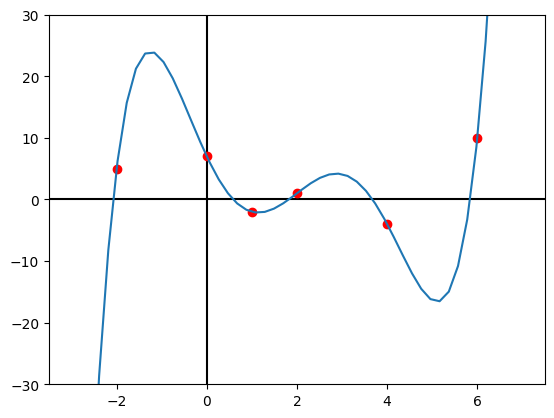

In [34]:
# draw the x and y axis
plt.axvline(x=0, c="black", label="x=0")
plt.axhline(y=0, c="black", label="y=0")
plt.ylim(-30,30)

# Plot the given points.
x = [-2, 0, 1, 2, 4, 6]
y = [5, 7, -2, 1, -4, 10]
plt.plot(x, y, 'o', color='red')

# Plot the equation.
x = np.linspace(-3,7,50)
plt.plot(x,(851/5760)*x**5 - (1675/1152)*x**4 + (439/144)*x**3 + (1387/288)*x**2 - (1867/120)*x + 7)

plt.show()